In [1]:
pwd

'D:\\datasets\\house price prediction'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [4]:
train.shape,test.shape

((1460, 81), (1459, 80))

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train.isnull().sum().sort_values(ascending=False).head(15)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
dtype: int64

In [7]:
#test.isnull().sum().sort_values(ascending=False).head(15)

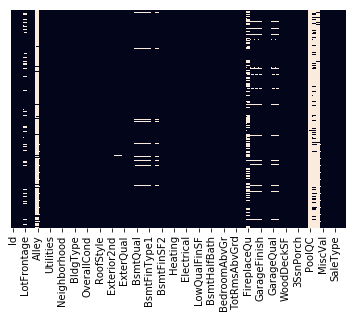

In [8]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [9]:
#sns.heatmap(test.isnull(),yticklabels=False,cbar=False)

In [10]:
train.drop(['PoolQC','Fence','MiscFeature','Alley','FireplaceQu','Id'],axis=1,inplace=True)
test.drop(['PoolQC','Fence','MiscFeature','Alley','FireplaceQu','Id'],axis=1,inplace=True)

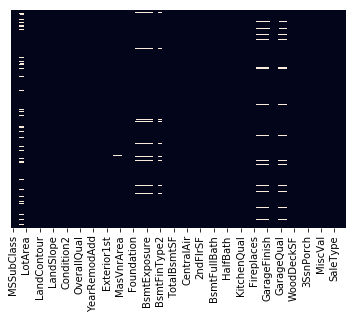

In [11]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 no

In [13]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [14]:
def categorical_missing(df):
    df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
    df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
    df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])
    df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
    df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
    df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])
    df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
    df['BsmtFinType1']=df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
    df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
    df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
    df['MSZoning']=df['MSZoning'].fillna(df['MSZoning'].mode()[0])
    df['Exterior1st']=df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
    df['Exterior2nd']=df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
    df['BsmtFullBath']=df['BsmtFullBath'].fillna(df['BsmtFullBath'].mode()[0])
    df['BsmtHalfBath']=df['BsmtHalfBath'].fillna(df['BsmtHalfBath'].mode()[0])
    df['KitchenQual']=df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])
    df['Functional']=df['Functional'].fillna(df['Functional'].mode()[0])
    df['SaleType']=df['SaleType'].fillna(df['SaleType'].mode()[0])
    return df

In [15]:
train=categorical_missing(train)
test=categorical_missing(test)

In [16]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


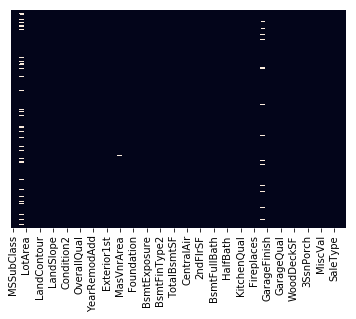

In [17]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [18]:
#sns.heatmap(test.isnull(),yticklabels=False,cbar=False)

In [19]:
test.isnull().sum().sort_values(ascending=False).head(8)

LotFrontage    227
GarageYrBlt     78
MasVnrArea      15
Utilities        2
TotalBsmtSF      1
GarageArea       1
BsmtFinSF1       1
BsmtFinSF2       1
dtype: int64

In [20]:
train.isnull().sum().sort_values(ascending=False).head(8)

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
Electrical       1
SalePrice        0
ExterCond        0
RoofMatl         0
Exterior1st      0
dtype: int64

In [21]:
def non_categorical_missing(df):
    df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())
    df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mean())
    df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())
    df['BsmtFinSF1']=df['BsmtFinSF1'].fillna(df['BsmtFinSF1'].mean())
    df['BsmtFinSF2']=df['BsmtFinSF2'].fillna(df['BsmtFinSF2'].mean())
    df['TotalBsmtSF']=df['TotalBsmtSF'].fillna(df['TotalBsmtSF'].mean())
    return df

In [22]:
train=non_categorical_missing(train)
test=non_categorical_missing(test)

In [23]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [24]:
train.shape,test.shape

((1460, 75), (1459, 74))

In [25]:
final=pd.concat([train,test],axis=0)

C:\Users\DELL\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [26]:
final.shape

(2919, 75)

In [27]:
mylist = list(train.select_dtypes(include=['object']).columns)
len(mylist)

#mylist = combined.dtypes[combined.dtypes=="object"].index.values

38

In [28]:
def category_onehot_multcols(multcolumns):
    df_final=final
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final[fields],drop_first=True)
        
        final.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final,df_final],axis=1)
        
    return df_final

In [29]:
final=category_onehot_multcols(mylist)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [30]:
final.shape

(2919, 233)

In [31]:
final.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,0,0,1,0,0,0,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,0,0,1,0,0,0,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,0,0,1,0,0,0,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,0,0,1,0,0,0,0,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,0,0,1,0,0,0,1,0


In [32]:
#total = train.isnull().sum().sort_values(ascending=False)
#percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)*100
#missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
#missing_data.head(8)

In [33]:
#train['Electrical'].isnull()

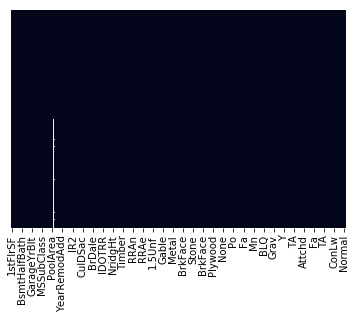

In [34]:
sns.heatmap(final.isnull(),yticklabels=False,cbar=False)

In [35]:
#final.isnull().sum().sort_values(ascending=False)

In [36]:
final.shape

(2919, 233)

In [37]:
final =final.loc[:,~final.columns.duplicated()]

In [38]:
final.shape

(2919, 177)

In [39]:
final.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,0,0,1,0,0,0,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,0,0,1,0,0,0,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,0,0,1,0,0,0,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,0,0,1,0,0,0,0,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,0,0,1,0,0,0,1,0


In [40]:
train=final.iloc[:1460,:]
test=final.iloc[1460:,:]

In [41]:
test.drop(['SalePrice'],axis=1,inplace=True)

C:\Users\DELL\Miniconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [42]:
train.shape,test.shape

((1460, 177), (1459, 176))

In [43]:
test.columns.sort_values(ascending=False)

Index(['YrSold', 'YearRemodAdd', 'YearBuilt', 'Y', 'WoodDeckSF', 'Wood',
       'WdShngl', 'WdShing', 'WdShake', 'Wd Shng',
       ...
       'AdjLand', '3SsnPorch', '2ndFlrSF', '2fmCon', '2Story', '2.5Unf',
       '2.5Fin', '1stFlrSF', '1Story', '1.5Unf'],
      dtype='object', length=176)

In [44]:
train.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,0,0,1,0,0,0,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,0,0,1,0,0,0,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,0,0,1,0,0,0,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,0,0,1,0,0,0,0,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,0,0,1,0,0,0,1,0


In [45]:
test.shape

(1459, 176)

In [46]:
X_train=train.drop(['SalePrice'],axis=1)
y_train=train['SalePrice']

In [47]:
import xgboost
classifier=xgboost.XGBRegressor()
classifier.fit(X_train,y_train)

C:\Users\DELL\Miniconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Miniconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [48]:
y_pred=classifier.predict(test)

In [49]:
y_pred

array([124454.31, 156617.06, 180028.75, ..., 168865.73, 121561.18,
       237769.38], dtype=float32)

In [50]:
##Create Sample Submission file and Submit
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('submission_with_my_changes.csv',index=False)